<p align="center">
<img src='../../img/VerticaMLPython.png' width="180px">
</p>

# Vertica ML Python Exercise 10

During this exercice, we will:
<ul>
    <li> Create a KMeans Model
    <li> Find the K of the KMeans
    <li> Add the prediction in the Virtual Dataframe
    <li> Evaluate the model
</ul>
## Initialization

Let's create a cursor using the vertica_cursor function.

In [1]:
from vertica_ml_python.utilities import vertica_cursor
cur = vertica_cursor("VerticaDSN")

During this study, we will work with the iris dataset.

In [2]:
from vertica_ml_python import vDataframe
iris = vDataframe('iris', cur)

This dataset is based on 3 flowers species. The purpose is to segment these species using only the flowers metrics. 

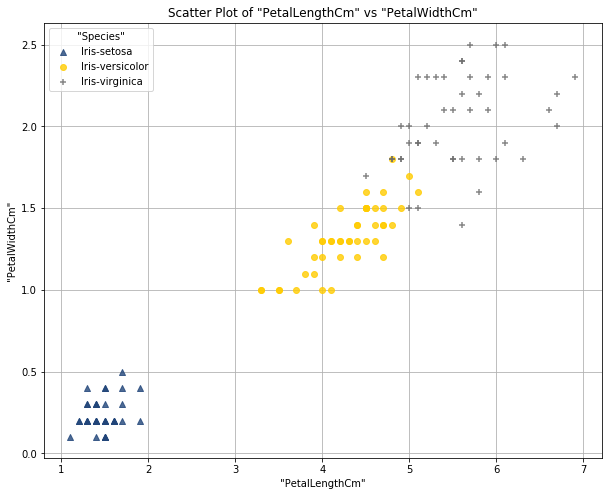

In [3]:
%matplotlib inline
x = iris.scatter(["PetalLengthCm", "PetalWidthCm"], catcol = "Species")

## Clustering

Let's explore the dataset by displaying descriptive statistics of all the columns.

In [4]:
iris.describe(method = "categorical")

,dtype,unique,count,top,top_percent
"""PetalLengthCm""","numeric(5,2)",43,150,1.50,9.333
"""SepalLengthCm""","numeric(5,2)",35,150,5.00,6.667
"""SepalWidthCm""","numeric(5,2)",23,150,3.00,17.333
"""PetalWidthCm""","numeric(5,2)",22,150,0.20,18.667
"""Species""",varchar(30),3,150,Iris-setosa,33.333


<object>

<b>Question 1: </b>Find the best K which will segment the data with an elbow score greater than 0.8

In [5]:
from vertica_ml_python.learn.model_selection import best_k
best_k(X = ["PetalLengthCm", "SepalLengthCm", "SepalWidthCm", "PetalWidthCm"], 
       input_relation = "iris",
       cursor = cur,
       n_cluster = (1,10),
       elbow_score_stop = 0.8)

3

<b>Question 2: </b>Use this K to create a KMeans model.

In [6]:
from vertica_ml_python.learn.cluster import KMeans
from vertica_ml_python.utilities import drop_model

drop_model("kmeans_iris", cur)
model = KMeans(name = "kmeans_iris", cursor = cur, n_cluster = 3)
model.fit("iris", ["PetalLengthCm", "SepalLengthCm", "SepalWidthCm", "PetalWidthCm"])

The model kmeans_iris was successfully dropped.




centers
petallengthcm|sepallengthcm|sepalwidthcm|petalwidthcm
-------------+-------------+------------+------------
   4.39355   |   5.90161   |   2.74839  |   1.43387  
   1.46400   |   5.00600   |   3.41800  |   0.24400  
   5.74211   |   6.85000   |   3.07368  |   2.07105  


metrics
Evaluation metrics:
     Total Sum of Squares: 680.8244
     Within-Cluster Sum of Squares: 
         Cluster 0: 39.820968
         Cluster 1: 15.2404
         Cluster 2: 23.879474
     Total Within-Cluster Sum of Squares: 78.940841
     Between-Cluster Sum of Squares: 601.88356
     Between-Cluster SS / Total SS: 88.41%
 Number of iterations performed: 6
 Converged: True
 Call:
kmeans('public.kmeans_iris', 'iris', '"PetalLengthCm", "SepalLengthCm", "SepalWidthCm", "PetalWidthCm"', 3
USING PARAMETERS max_iterations=300, epsilon=0.0001, init_method='kmeanspp', distance_method='euclidean')

<b>Question 3: </b>Add the prediction in the Virtual Dataframe. Draw an histogram of the Species and the predictions. What do you notice ?

In [7]:
model.add_to_vdf(iris, name = "prediction")

,PetalLengthCm,SepalLengthCm,SepalWidthCm,PetalWidthCm,Species,prediction
0,1.10,4.30,3.00,0.10,Iris-setosa,1
1,1.40,4.40,2.90,0.20,Iris-setosa,1
2,1.30,4.40,3.00,0.20,Iris-setosa,1
3,1.30,4.40,3.20,0.20,Iris-setosa,1
4,1.30,4.50,2.30,0.30,Iris-setosa,1
,...,...,...,...,...,...


<object>  Name: iris, Number of rows: 150, Number of columns: 6

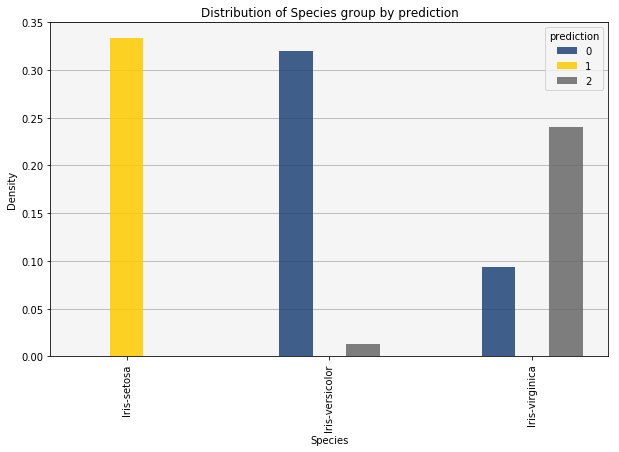

,PetalLengthCm,SepalLengthCm,SepalWidthCm,PetalWidthCm,Species,prediction
0,1.10,4.30,3.00,0.10,Iris-setosa,1
1,1.40,4.40,2.90,0.20,Iris-setosa,1
2,1.30,4.40,3.00,0.20,Iris-setosa,1
3,1.30,4.40,3.20,0.20,Iris-setosa,1
4,1.30,4.50,2.30,0.30,Iris-setosa,1
,...,...,...,...,...,...


<object>  Name: iris, Number of rows: 150, Number of columns: 6

In [8]:
%matplotlib inline
iris.hist(["Species", "prediction"])

<p style="color:red">We can see that the Iris Setosa is perfectly predicted. We did some mistakes to predict the two other species. The Iris Virginica is harder to classify than the others.</p>